# Ingeniería de características

En este cuaderno vamos a realizar *ingeniería* de  características a partir de aquellas que habíamos extraido de los conjuntos de datos *1000ceros.csv* y *1000unos.csv*: la "anchura" y la "altura" de la cifra que se ve en una imagen.

---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2020, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2020, URJC (Spain)

    alfredo.cuesta@urjc.es

In [1]:
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
FullSet_0 = pd.read_csv('../../Datasets/1000ceros.csv', header=None)
FullSet_1 = pd.read_csv('../../Datasets/1000unos.csv',  header=None)

#--Quick rescale to [0,1] given that any pixel is in [0,255]
FullSet_0 = (FullSet_0 / 255.0)
FullSet_1 = (FullSet_1 / 255.0)

La siguiente función extrae las características *height*, *width*, *W_max1*, *W_max2*, *W_max3*, *H_max1*, *H_max2* y *H_max3* a la vez sobre un dataframe

In [3]:
def feat_extraction(data, theta=0.1):
    # data: dataframe
    # theta: parameter of the feature extraction
    #
    features = np.zeros([data.shape[0], 8]) #<- allocate memory with zeros
    data = data.values.reshape([data.shape[0],28,28]) 
    #-> axis 0: id of instance, axis 1: width(cols) , axis 2: height(rows)
    for k in range(data.shape[0]):
        #..current image 
        x = data[k,:,:]
        #--width feature
        sum_cols = x.sum(axis=0) #<- axis0 of x, not of data!!
        indc = np.argwhere(sum_cols > theta * sum_cols.max())
        col_3maxs = np.argsort(sum_cols)[-3:] 
        features[k,0] = indc[-1] - indc[0]
        features[k,1:4] = col_3maxs
        #--width feature
        sum_rows = x.sum(axis=1) #<- axis1 of x, not of data!!
        indr = np.argwhere(sum_rows > theta * sum_rows.max())
        features[k,4] = indr[-1] - indr[0]
        row_3maxs = np.argsort(sum_rows)[-3:] 
        features[k,5:8] = row_3maxs
    col_names = ['width','W_max1','W_max2','W_max3','height','H_max1','H_max2','H_max3']
    return pd.DataFrame(features,columns = col_names)    

Convertimos *FullSet_0* y *FullSet_1* en *FeatSet_0* y *FeatSet_1* con esta función. <br>
Añadimos **theta** para modificar las características de anchura y altura.

In [4]:
theta = 0.5
FeatSet_0 = feat_extraction(FullSet_0)
FeatSet_1 = feat_extraction(FullSet_1)

La **ingeniería de características** consiste en construir nuevas características a partir de las que ya tenemos.

Por ejemplo podemos calcular el **area** de la cifra mostrada en una imagen multiplicando su anchura por su altura

In [5]:
def feat_area(features):
    area = features['width'] * features['height']
    return pd.DataFrame({'area':area})

In [6]:
area=feat_area(FeatSet_0)
FeatSet_0 = pd.concat([FeatSet_0, area],axis=1)

area=feat_area(FeatSet_1)
FeatSet_1 = pd.concat([FeatSet_1, area],axis=1)

Podemos ver los dataframes de características resultantes y visualizar el espacio de caracteísticas si seleccionamos dos de ellas.

In [7]:
FeatSet_0.head()

,width,W_max1,W_max2,W_max3,height,H_max1,H_max2,H_max3,area
0,16.0,7.0,8.0,20.0,19.0,9.0,21.0,8.0,304.0
1,17.0,8.0,21.0,20.0,19.0,21.0,20.0,10.0,323.0
2,13.0,18.0,12.0,11.0,19.0,7.0,21.0,8.0,247.0
3,14.0,19.0,10.0,18.0,19.0,21.0,9.0,20.0,266.0
4,17.0,7.0,19.0,20.0,19.0,22.0,8.0,9.0,323.0


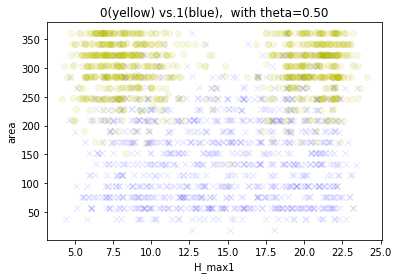

In [8]:
def jitter(X,sigma=0.3):
    random_sign = (-1)**np.random.randint(1,3,*X.shape)
    return X + np.random.normal(0,sigma,*X.shape)*random_sign


horizontal = 'H_max1'
vertical = 'area'
alpha = 0.1
sigma = 0.3
plt.plot(jitter(FeatSet_0[horizontal],sigma), jitter(FeatSet_0[vertical],sigma),'yo',alpha=alpha)
plt.plot(jitter(FeatSet_1[horizontal],sigma), jitter(FeatSet_1[vertical],sigma),'bx',alpha=alpha)
plt.xlabel(horizontal)
plt.ylabel(vertical)
plt.title('0(yellow) vs.1(blue),  with theta=%0.2f'%theta)
plt.show()

### Ejercicio
+ Crear nuevas características derivadas de las primeras 8 extraidas y añadelas a *FeatSet_0* y *FeatSet_1*

**Repaso** 

+ Te habrás dado cuenta de que ninguna de ellas está ya en el intervalo [0,1]. <br>
  De hecho la escala de algunas es muy superior a la de otras, por ejemplo el área es un orden de magnitud superior. <br>
  $\Rightarrow$ Crea una función que escale un dataframe a [0,1] de acuerdo con el valor máximo y mínimo de cada una de sus columnas. <br>
  $\quad$ Recuerda que la función debe devolver el dataframe escalado y los valores respecto a los cuales ha escalado.
  
*Esta función ya se creó en un cuaderno anterior. En el futuro utilizaremos métodos de scikit-learn para esto.*

## Conclusiones
+ Hemos visto que a partir de la imagen *cruda*, que por pequeña que sea vive en un mundo de muy alta dimensionalidad, podemos extraer características mucho más representativas que simplemente el valor de los píxeles, y así reducir su dimensión, incluso hasta el punto de poder llegar a mostrar el conjunto de datos en un gráfico.
+ En imagen hay varios métodos que producen descriptores (LBP, HOG, ... ) 
+ Además, con las **redes convolucionales** (2ª parte del curso) es posible aprender las características visuales de una imagen a la vez que el algoritmo clasificador.
+ Sin embargo el reconocimiento de patrones en visión artificial también sirve para razonar sobre la imagen a partir de datos. <br>
 Por eso conviene conocer no sólo las técnicas de Deep Learning, sino también métodos más ligeros, mucho menos parametrizados que funcionan sobre datos tabulados, no sobre imágenes.
+ La extracción e ingeniería de características es tan importante como difícil. <br>
 
+ *En Github se puede encontrar el proyecto de [Micah J. Smith (MIT)](https://github.com/HDI-Project/ballet), que presenta un módulo python para extracción de características y que se integra en scikit-learn y pandas.*